In [2]:

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import neighbors

from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

# Présentation de l'idée l'application 

Présentation de l'idée l'application
Une application destinée aux sportifs ou aux personnes qui voudraient commencer le sport. L'utilisateur devra tout d'abord fixer ses objectifs dans l'application :

- Perte de poids
- Prise de masse
- Pas d'objectif particulier

L'objectif de cette application est de fournir une alimentation saine a l'utilisateur quel que soit l'objectif voulu.

Perte de poids = aliment peu sucré et salé, peu gras, peu calorique, beaucoup de fibre tout en ayant un bon nutriscore
Prise de masse = aliment peu sucré et salé, très protéine , peu gras, le plus calorique possible tout en ayant un bon nutriscore
Pas d'objectif particulier = une alimentation équilibre qui propose les produits les plus sains possibles (peu sucré et salé, peu gras, beaucoup de fibre, quantité moyenne de protéine...)
Déroulement de l'application :

Un produit est scanné -> un score apparaît à l’écran pour noter le produit, des produit similaire et mieux noté peuvent ensuite entre proposer à l'utilisateur s'il le souhaite. Le score des produits est calculé en fonction des ingrédients présent dans le produit, mais aussi du choix de l'objectif précédemment choisi par l'utilisateur.


# Présentation du document 

In [5]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

In [6]:
data.shape

(320772, 162)

In [7]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [8]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [9]:
#nombre de doublons 
data.duplicated().sum()


0

In [10]:
data.describe(exclude=[np.number])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,248905,154680,154680,4835,11696,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836
unique,320749,320749,3535,189567,189568,180495,180495,221347,38584,13826,14547,12064,58784,50253,36982,21142,21152,4840,4372,7308,6736,18114,13653,13655,8462,8158,1602,3,2572,5120,3259,1434,725,722,205520,12939,19,8378,3578,3584,25423,196069,41537,41537,14,160,5,14,42,1021,1021,1021,3543,3543,75836,75836
top,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,Carton,"sachet,plastique",Carrefour,carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits",France,france,France,france,"Organic, EU Organic, fr:AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",EMB 56251E,emb-56251e,"47.633333,-2.666667",c,theix-morbihan-france,France,Carrefour,US,en:united-states,États-Unis,"Carbonated water, natural flavor.",blé,http://fr.openfoodfacts.org/images/products/30...,Fruits à coque,en:nuts,Fruits à coque,240 ml (8 fl oz),[ extra-virgin-olive-oil -> en:extra-virgin-o...,en:e322,E322 - Lécithines,huile-de-palme,e160a-beta-carotene,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:beverages,Boissons,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...
freq,1,1,169868,20,20,33,33,410,201,4669,2153,3959,2978,3149,301,802,802,5171,5303,9371,9451,3223,5311,5311,218,218,279,9,270,11762,6465,169928,172998,172998,222,1279,1,1240,2051,2051,5496,397,8264,8264,4586,2843,62763,22624,22624,168905,168905,168905,6054,6054,1,1


In [11]:
data['created_datetime'] = pd.to_datetime(data['created_datetime'], errors ='coerce')
data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'], errors = 'coerce')
data



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17 09:17:46+00:00,1474103893,2016-09-17 09:18:13+00:00,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ ban

In [12]:
data.dtypes

code                                                       object
url                                                        object
creator                                                    object
created_t                                                  object
created_datetime                              datetime64[ns, UTC]
last_modified_t                                            object
last_modified_datetime                        datetime64[ns, UTC]
product_name                                               object
generic_name                                               object
quantity                                                   object
packaging                                                  object
packaging_tags                                             object
brands                                                     object
brands_tags                                                object
categories                                                 object
categories

# Le nombre de NaN par colonne 

In [13]:

def missing_values_by_column1(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    missing_values = data.isnull()
    # Appliquer la méthode "sum" par colonne pour compter les valeurs manquantes par colonne
    missing_values_count = missing_values.sum()
    return missing_values_count

In [14]:
missing_values_by_column1(data)

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                  24
last_modified_t                                    0
last_modified_datetime                            23
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [15]:
## nombre total de données manquante
missing_values_by_column1(data).sum()

39608627

In [16]:
data.shape

(320772, 162)

on peut observer que certaines colonnes sont entierement vide (shape = nombre de NaN de la colonne), il faut donc supprimer certaine colonne qui sont inutilisabe pour notre analyse.

# je supprime les colonnes avec trop de NaN

In [17]:

def colonne_NAN(data, taux): 
    NAN_rate = ((data.isnull().sum() / data.shape[0])*100).sort_values(ascending=False).reset_index() 
    NAN_rate.columns = ['Variable','Taux_de_Null'] 
    NANs_rate = NAN_rate[NAN_rate.Taux_de_Null >= taux] 
    return NANs_rate

In [18]:
#taux de nan par colonne 
tauxNAN = colonne_NAN(data, 0)
tauxNAN

,Variable,Taux_de_Null
0,water-hardness_100g,100.0
1,no_nutriments,100.0
2,ingredients_that_may_be_from_palm_oil,100.0
3,nutrition_grade_uk,100.0
4,nervonic-acid_100g,100.0
5,erucic-acid_100g,100.0
6,mead-acid_100g,100.0
7,elaidic-acid_100g,100.0
8,butyric-acid_100g,100.0
9,caproic-acid_100g,100.0


In [19]:
data.dtypes

code                                                       object
url                                                        object
creator                                                    object
created_t                                                  object
created_datetime                              datetime64[ns, UTC]
last_modified_t                                            object
last_modified_datetime                        datetime64[ns, UTC]
product_name                                               object
generic_name                                               object
quantity                                                   object
packaging                                                  object
packaging_tags                                             object
brands                                                     object
brands_tags                                                object
categories                                                 object
categories

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161]),
 [Text(0, 0, 'water-hardness_100g'),
  Text(1, 0, 'no_nutriments'),
  Text(2, 0, 'in

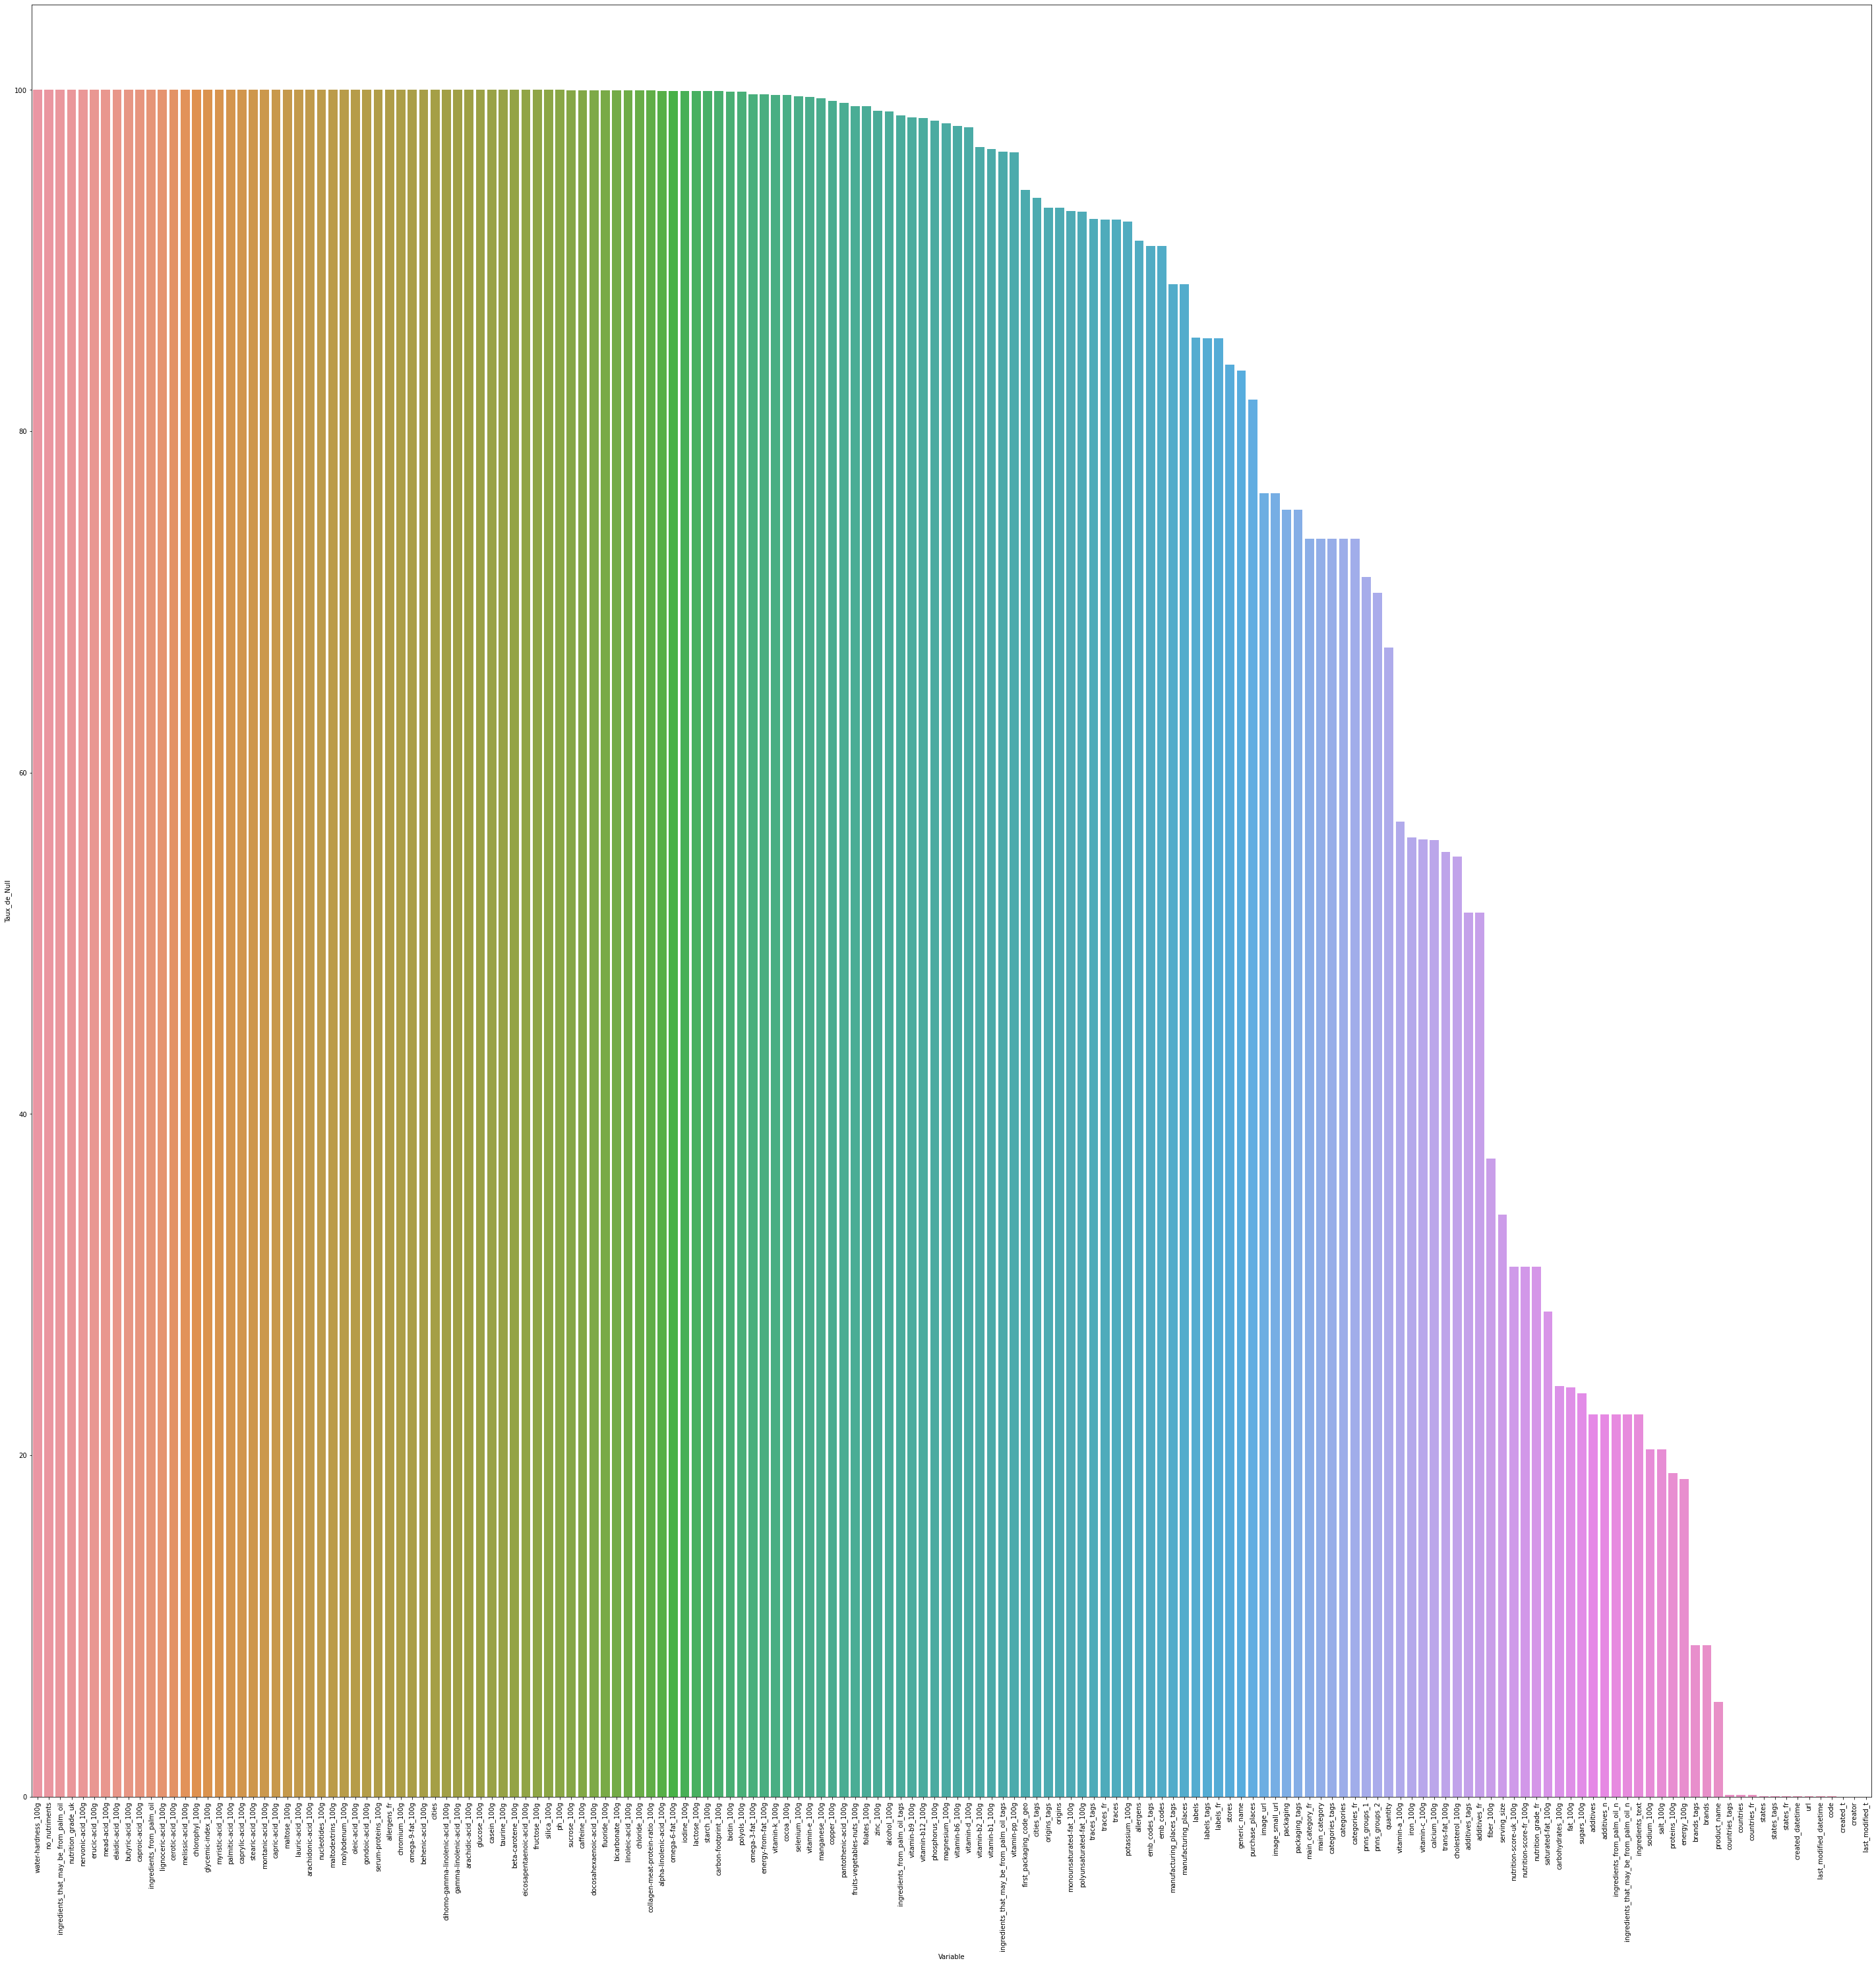

In [20]:
plt.figure(figsize = (50,50))
sns.barplot(x ='Variable', y = 'Taux_de_Null', data=tauxNAN )
plt.xticks(rotation=90) 

In [21]:
#j'ai rajouté la colonne taux de remplissage qui est plus facilement comprehensible.

datan2 = colonne_NAN(data, 0)
datan2["Taux de remplissage"] = 100-datan2["Taux_de_Null"]
datan2 = datan2.sort_values("Taux de remplissage", ascending=False) 

datan2

,Variable,Taux_de_Null,Taux de remplissage
161,last_modified_t,0.0,100.0
160,creator,0.0,100.0
159,created_t,0.0,100.0
158,code,0.0,100.0
157,last_modified_datetime,0.0,100.0
156,url,0.0,100.0
155,created_datetime,0.0,100.0
152,states,0.0,100.0
153,states_tags,0.0,100.0
154,states_fr,0.0,100.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161]),
 [Text(0, 0, 'last_modified_t'),
  Text(1, 0, 'creator'),
  Text(2, 0, 'created_t'),

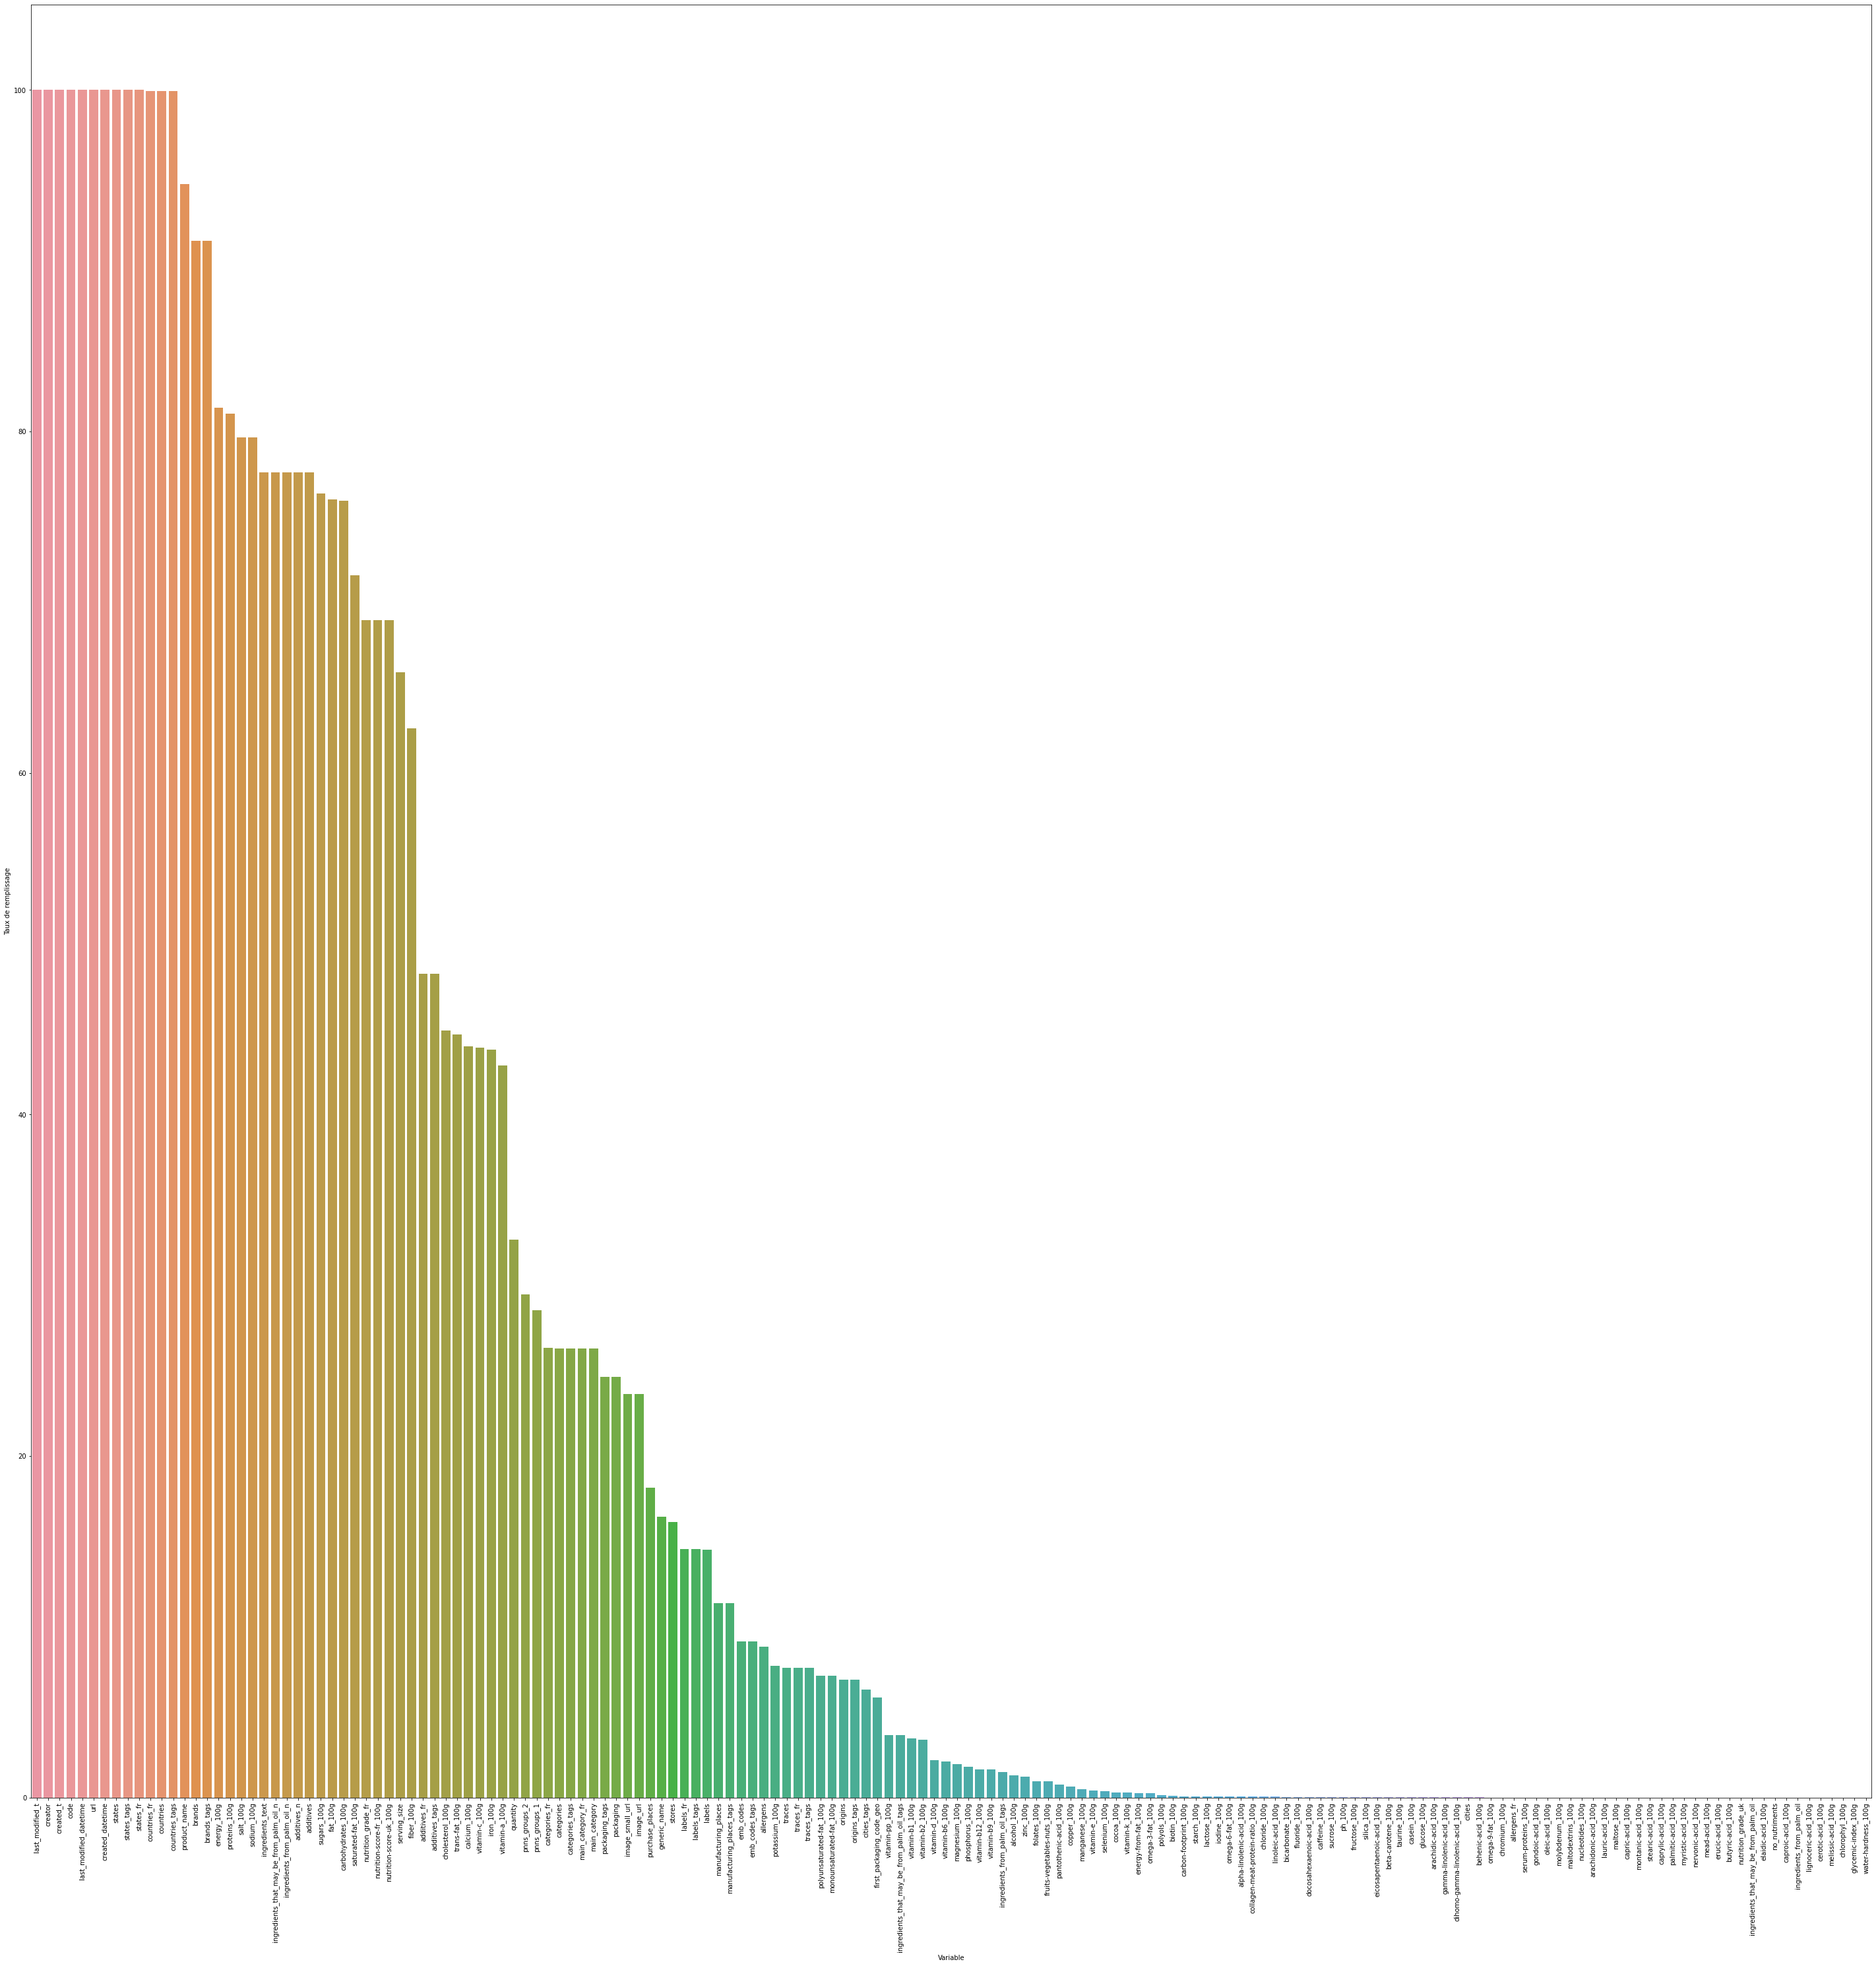

In [22]:
plt.figure(figsize = (50,50))
sns.barplot(x ='Variable', y = 'Taux de remplissage', data=datan2 )
plt.xticks(rotation=90) 

In [73]:
#mise en place du seuil a 60%, j'affiche les colonnes qui ont plus de 40% 
data2 = datan2.loc[datan2['Taux de remplissage']> 40, 'Variable']
data2

161                            last_modified_t
160                                    creator
159                                  created_t
158                                       code
157                     last_modified_datetime
156                                        url
155                           created_datetime
152                                     states
153                                states_tags
154                                  states_fr
151                               countries_fr
150                                  countries
149                             countries_tags
148                               product_name
147                                     brands
146                                brands_tags
145                                energy_100g
144                              proteins_100g
143                                  salt_100g
142                                sodium_100g
141                           ingredients_text
140    ingred

In [74]:
dataB = list(datan2.loc[datan2['Taux de remplissage']>=40, 'Variable'].values)
data2 = data[dataB]
data2

,last_modified_t,creator,created_t,code,last_modified_datetime,url,created_datetime,states,states_tags,states_fr,countries_fr,countries,countries_tags,product_name,brands,brands_tags,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_text,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,serving_size,fiber_100g,additives_fr,additives_tags,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
0,1474103893,openfoodfacts-contributors,1474103866,0000000003087,2016-09-17 09:18:13+00:00,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17 09:17:46+00:00,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",France,en:FR,en:france,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1489069957,usda-ndb-import,1489069957,0000000004530,2017-03-09 14:32:37+00:00,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09 14:32:37+00:00,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",États-Unis,US,en:united-states,Banana Chips Sweetened (Whole),NaN,NaN,2243.0,3.6,0.0,0.0,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.3,28.6,64.3,28.6,d,14.0,14.0,28 g (1 ONZ),3.6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,1489069957,usda-ndb-import,1489069957,0000000004559,2017-03-09 14:32:37+00:00,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09 14:32:37+00:00,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",États-Unis,US,en:united-states,Peanuts,Torn & Glasser,torn-glasser,1941.0,17.9,0.6,0.2,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,0.0,b,0.0,0.0,28 g (0.25 cup),7.1,NaN,NaN,0.0,0.0,0.1,0.0,0.0,0.0
3,1489055731,usda-ndb-import,1489055731,0000000016087,2017-03-09 10:35:31+00:00,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09 10:35:31+00:00,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",États-Unis,US,en:united-states,Organic Salted Nut Mix,Grizzlies,grizzlies,2540.0,17.9,1.2,0.5,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,d,12.0,12.0,28 g (0.25 cup),7.1,NaN,NaN,NaN,NaN,0.1,NaN,0.0,NaN
4,1489055653,usda-ndb-import,1489055653,0000000016094,2017-03-09 10:34:13+00:00,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09 10:34:13+00:00,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",États-Unis,US,en:united-states,Organic Polenta,Bob's Red Mill,bob-s-red-mill,1552.0,8.6,NaN,NaN,Organic polenta,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.4,77.1,NaN,NaN,NaN,NaN,35 g (0.25 cup),5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,1491244498,openfoodfacts-contributors,1490631299,9948282780603,2017-04-03 18:34:58+00:00,http://world-fr.openfoodfacts.org/produit/9948...,2017-03-27 16:14:59+00:00,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",Roumanie,en:RO,en:romania,Tomato & ricotta,Panzani

# Selection des colonnes utile a notre analyse

In [75]:
data2 = data2.drop(columns=['countries_tags','countries','last_modified_t',
                                   'creator',
                                  'created_t',
                                       'code',
                     'last_modified_datetime',
                                        'url',
                           'created_datetime',
                                    'states',
                               'states_tags',
                                  'states_fr','brands','brands_tags','ingredients_text','nutrition-score-uk_100g','serving_size','additives_tags'])

In [76]:
data2

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
0,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,États-Unis,Banana Chips Sweetened (Whole),2243.0,3.6,0.0,0.0,0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.3,28.6,64.3,28.6,d,14.0,3.6,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,0.0,b,0.0,7.1,NaN,0.0,0.0,0.1,0.0,0.0,0.0
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,d,12.0,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
4,États-Unis,Organic Polenta,1552.0,8.6,NaN,NaN,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.4,77.1,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,Roumanie,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,États-Unis,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,0.0,0.0,0.0,b,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
320769,Chine,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,France,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# je supprime les lignes qui contiennt trop de NaN

In [77]:
#fonction qui va me permettre de supprimer les produits qui n'ont pas assez de données renseigner 

def remove_rows(data,taux):
    # calculer le pourcentage de valeurs manquante par ligne
    missing_value_count = data.isna().sum(axis=1)
    missing_value_percent = missing_value_count / data.shape[1]*100
    # garder les lignes qui ont le moins de valeurs manquantes que le seuil
    data = data[missing_value_percent < taux]
    return data

In [80]:
#seuil de 40% de données manquante par ligne 
data2 = remove_rows(data2,40)

data2


,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
1,États-Unis,Banana Chips Sweetened (Whole),2243.0,3.6,0.0,0.0,0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.3,28.6,64.3,28.6,d,14.0,3.6,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,0.0,b,0.0,7.1,NaN,0.0,0.0,0.1,0.0,0.0,0.0
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,d,12.0,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,NaN,NaN,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,11.5,18.3,63.5,1.9,NaN,NaN,7.7,NaN,NaN,NaN,0.0,NaN,0.0,NaN
7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,15.6,18.8,57.8,4.7,c,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",NaN,NaN,0.1,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320730,États-Unis,"Sour Licorice Twists, Sour Cherry",1360.0,2.5,0.0,0.0,0.0,0.0,3.0,[ organic-wheat-flour -> en:organic-wheat-flo...,32.5,1.2,72.5,NaN,NaN,NaN,0.0,"E422 - Glycérol,E330 - Acide citrique,E296 - A...",NaN,NaN,0.0,NaN,0.0,NaN
320738,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,30.6,9.7,61.1,2.8,d,11.0,8.3,E322 - Lécithines,0.0,0.0,0.6,0.1,0.0,0.0
320742,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],2.4,0.0,87.1,0.0,a,-1.0,4.7,NaN,0.0,0.0,0.0,0.0,0.0,0.0
320763,France,Thé vert Earl grey,21.0,0.5,0.0,0.0,0.0,0.0,0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.5,0.2,0.5,0.2,c,2.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outliers 

Je vais commencer par les colonnes avec le suffixe _100g. Les produits ne doivent pas depasser les 100g

In [29]:
data_100g = data2[['fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 
       'nutrition-score-fr_100g', 'cholesterol_100g', 'trans-fat_100g', 'calcium_100g',
       'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g']]
## energy pas prit en compte l'energie qui ne se compte pas en g 
data_100g.describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,209810.0,202619.0,209811.0,204995.0,176979.0,210156.0,210548.0,210543.0,196489.0,143481.0,142328.0,140094.0,139941.0,140026.0,137124.0
mean,13.5,5.0,32.6,15.3,2.9,7.6,1.8,0.7,9.2,0.0,0.1,0.1,0.0,0.0,0.0
std,17.5,7.8,28.5,21.5,13.5,8.2,141.1,55.6,9.1,0.4,1.5,3.3,1.1,0.2,0.0
min,0.0,0.0,0.0,-17.9,-6.7,-3.6,0.0,0.0,-15.0,0.0,-3.6,0.0,-0.0,-0.0,-0.0
25%,0.5,0.0,6.7,1.4,0.0,1.3,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.7,1.8,22.2,5.4,1.6,5.3,0.6,0.3,10.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,21.4,7.1,58.6,23.3,3.6,10.7,1.4,0.6,16.0,0.0,0.0,0.1,0.0,0.0,0.0
max,714.3,550.0,209.4,3520.0,5380.0,430.0,64312.8,25320.0,40.0,95.2,369.0,694.7,370.4,50.0,0.8


In [48]:


def plot_boxplots(df):
    ncol = df.shape[1]
    
    plt.figure(figsize=(10, 15))
    for i, col in enumerate(df.columns):
        plt.subplot(ncol, 1, i+1)
        sns.boxplot(df[col])
        plt.title(col)
        plt.axvline(x=100, color='red')
        plt.axvline(x=0, color='red')
        
    plt.tight_layout()
    plt.show()



/Users/niya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/niya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/niya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

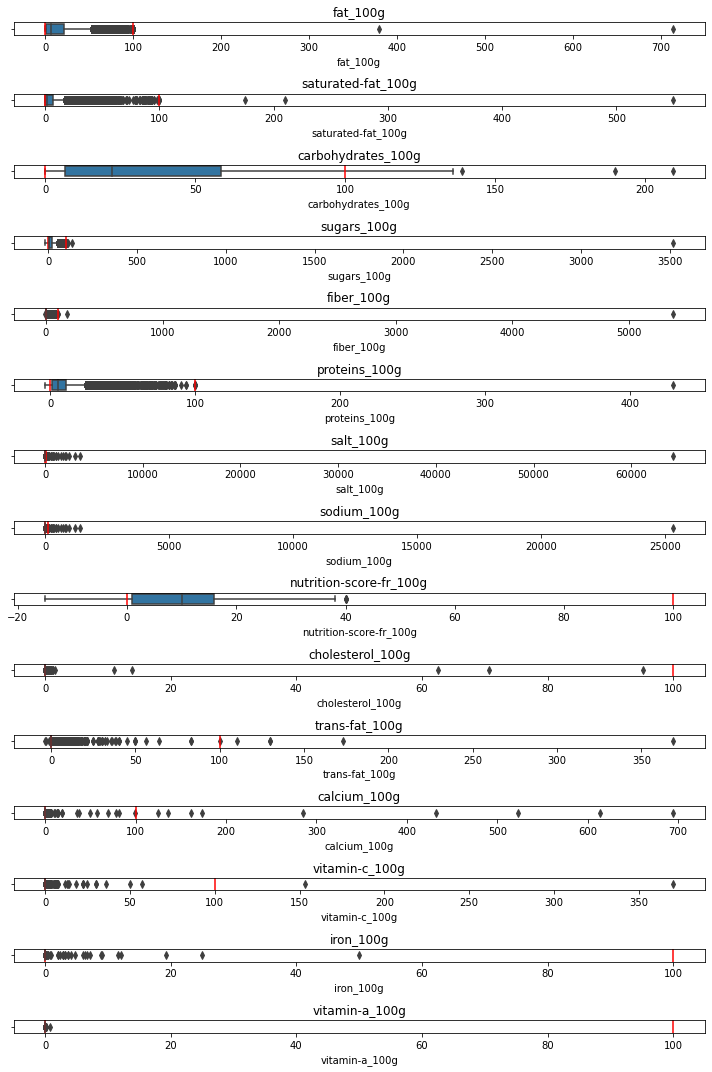

In [49]:
plot_boxplots(data_100g)

Certaines valeurs sont negatives et d'autre supérieur a 100.

In [50]:
data_100g.shape

(210761, 15)

In [51]:
negatives = data_100g < 0
nombre_negatives = negatives.sum().sum()
nombre_negatives

32247

In [52]:
##on va remplacer les valeurs negatifs par NaN

In [53]:
data_100g = data_100g.where(data_100g >0, np.nan)

data_100g.describe()


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,164278.0,137037.0,195457.0,173082.0,118006.0,175687.0,186460.0,186460.0,153153.0,54536.0,2965.0,89074.0,49479.0,97366.0,58530.0
mean,17.3,7.4,35.0,18.1,4.4,9.0,2.0,0.8,12.5,0.1,3.5,0.2,0.0,0.0,0.0
std,18.0,8.5,28.1,22.3,16.4,8.2,149.9,59.0,7.3,0.6,10.1,4.1,1.9,0.2,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.5,1.8,9.0,3.2,1.6,3.3,0.2,0.1,6.0,0.0,0.5,0.0,0.0,0.0,0.0
50%,12.0,4.9,26.7,8.6,3.0,6.8,0.8,0.3,13.0,0.0,1.4,0.1,0.0,0.0,0.0
75%,25.2,10.7,60.0,28.1,5.4,12.5,1.5,0.6,18.0,0.1,3.6,0.1,0.0,0.0,0.0
max,714.3,550.0,209.4,3520.0,5380.0,430.0,64312.8,25320.0,40.0,95.2,369.0,694.7,370.4,50.0,0.8


In [54]:

data_100g.shape


(210761, 15)

In [55]:
data_100g.describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,164278.0,137037.0,195457.0,173082.0,118006.0,175687.0,186460.0,186460.0,153153.0,54536.0,2965.0,89074.0,49479.0,97366.0,58530.0
mean,17.3,7.4,35.0,18.1,4.4,9.0,2.0,0.8,12.5,0.1,3.5,0.2,0.0,0.0,0.0
std,18.0,8.5,28.1,22.3,16.4,8.2,149.9,59.0,7.3,0.6,10.1,4.1,1.9,0.2,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.5,1.8,9.0,3.2,1.6,3.3,0.2,0.1,6.0,0.0,0.5,0.0,0.0,0.0,0.0
50%,12.0,4.9,26.7,8.6,3.0,6.8,0.8,0.3,13.0,0.0,1.4,0.1,0.0,0.0,0.0
75%,25.2,10.7,60.0,28.1,5.4,12.5,1.5,0.6,18.0,0.1,3.6,0.1,0.0,0.0,0.0
max,714.3,550.0,209.4,3520.0,5380.0,430.0,64312.8,25320.0,40.0,95.2,369.0,694.7,370.4,50.0,0.8


In [56]:
## on peut voir que certaines valeurs dépasse les 100 g, il faut donc les compter puis les supprimer si besoin 

In [57]:
positives = data_100g > 100
nombre_positives = positives.sum().sum()
nombre_positives

## le nombre est négligeable par rapport à la taille du dataframe, on peut donc les supprimer 

121

In [58]:
data_100g2 = data_100g[~(data_100g > 100).any(axis=1)]

data_100g2.describe()


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,164237.0,136999.0,195398.0,173030.0,117969.0,175637.0,186379.0,186379.0,153085.0,54522.0,2960.0,89040.0,49462.0,97332.0,58506.0
mean,17.3,7.4,35.0,18.1,4.3,9.0,1.5,0.6,12.5,0.1,3.2,0.2,0.0,0.0,0.0
std,17.9,8.3,28.1,20.6,4.8,8.1,4.5,1.8,7.3,0.5,5.7,0.7,0.5,0.2,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.5,1.8,9.0,3.2,1.6,3.3,0.2,0.1,6.0,0.0,0.5,0.0,0.0,0.0,0.0
50%,12.0,4.9,26.7,8.6,3.0,6.8,0.8,0.3,13.0,0.0,1.4,0.1,0.0,0.0,0.0
75%,25.2,10.7,60.0,28.1,5.4,12.5,1.5,0.6,18.0,0.1,3.6,0.1,0.0,0.0,0.0
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,39.4,40.0,95.2,100.0,99.0,57.1,50.0,0.8


In [59]:
data_100g2.shape

(210675, 15)

In [60]:
df_target = data2 
df_source = data_100g2

columns_to_replace = ['fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 
       'nutrition-score-fr_100g', 'cholesterol_100g', 'trans-fat_100g', 'calcium_100g',
       'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g']

df_target = df_target.assign(**{col:df_source[col] for col in columns_to_replace})
df_target

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
1,États-Unis,Banana Chips Sweetened (Whole),2243.0,3.6,NaN,NaN,0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.3,28.6,64.3,28.6,d,14.0,3.6,NaN,0.0,NaN,NaN,0.0,0.0,NaN
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,NaN,b,NaN,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,d,12.0,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,NaN,NaN,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,11.5,18.3,63.5,1.9,NaN,NaN,7.7,NaN,NaN,NaN,0.0,NaN,0.0,NaN
7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,15.6,18.8,57.8,4.7,c,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",NaN,NaN,0.1,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320730,États-Unis,"Sour Licorice Twists, Sour Cherry",1360.0,2.5,NaN,NaN,0.0,0.0,3.0,[ organic-wheat-flour -> en:organic-wheat-flo...,32.5,1.2,72.5,NaN,NaN,NaN,NaN,"E422 - Glycérol,E330 - Acide citrique,E296 - A...",NaN,NaN,NaN,NaN,NaN,NaN
320738,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,30.6,9.7,61.1,2.8,d,11.0,8.3,E322 - Lécithines,NaN,NaN,0.6,0.1,0.0,0.0
320742,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],2.4,NaN,87.1,NaN,a,NaN,4.7,NaN,NaN,NaN,NaN,NaN,0.0,NaN
320763,France,Thé vert Earl grey,21.0,0.5,0.0,0.0,0.0,0.0,0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.5,0.2,0.5,0.2,c,2.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_target.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,210461.0,175637.0,186379.0,186379.0,210293.0,210293.0,210293.0,173030.0,164237.0,195398.0,136999.0,153085.0,117969.0,54522.0,2960.0,89040.0,49462.0,97332.0,58506.0
mean,1188.0,9.0,1.5,0.6,0.1,0.0,2.0,18.1,17.3,35.0,7.4,12.5,4.3,0.1,3.2,0.2,0.0,0.0,0.0
std,7153.0,8.1,4.5,1.8,0.3,0.1,2.5,20.6,17.9,28.1,8.3,7.3,4.8,0.5,5.7,0.7,0.5,0.2,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,434.0,3.3,0.2,0.1,0.0,0.0,0.0,3.2,3.5,9.0,1.8,6.0,1.6,0.0,0.5,0.0,0.0,0.0,0.0
50%,1172.0,6.8,0.8,0.3,0.0,0.0,1.0,8.6,12.0,26.7,4.9,13.0,3.0,0.0,1.4,0.1,0.0,0.0,0.0
75%,1700.0,12.5,1.5,0.6,0.0,0.0,3.0,28.1,25.2,60.0,10.7,18.0,5.4,0.1,3.6,0.1,0.0,0.0,0.0
max,3251373.0,100.0,100.0,39.4,6.0,2.0,31.0,100.0,100.0,100.0,100.0,40.0,100.0,95.2,100.0,99.0,57.1,50.0,0.8


In [43]:
df_target[['energy_100g']]



,energy_100g
1,2243.0
2,1941.0
3,2540.0
5,1933.0
7,1833.0
...,...
320730,1360.0
320738,1393.0
320742,1477.0
320763,21.0


In [44]:
energy = data_100g > 3765.6
nombre_energy = energy.sum().sum()
nombre_energy

## on peut supprimer

3

In [45]:
# La valeur maximum pour 100 g en energy est de 3765,5klj pour 100g 
df_target = df_target[~((df_target['energy_100g'] > 3765.6))]

df_target

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
1,États-Unis,Banana Chips Sweetened (Whole),2243.0,3.6,NaN,NaN,0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.3,28.6,64.3,28.6,d,14.0,3.6,NaN,0.0,NaN,NaN,0.0,0.0,NaN
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,NaN,b,NaN,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,d,12.0,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,NaN,NaN,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,11.5,18.3,63.5,1.9,NaN,NaN,7.7,NaN,NaN,NaN,0.0,NaN,0.0,NaN
7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,15.6,18.8,57.8,4.7,c,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",NaN,NaN,0.1,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320730,États-Unis,"Sour Licorice Twists, Sour Cherry",1360.0,2.5,NaN,NaN,0.0,0.0,3.0,[ organic-wheat-flour -> en:organic-wheat-flo...,32.5,1.2,72.5,NaN,NaN,NaN,NaN,"E422 - Glycérol,E330 - Acide citrique,E296 - A...",NaN,NaN,NaN,NaN,NaN,NaN
320738,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,30.6,9.7,61.1,2.8,d,11.0,8.3,E322 - Lécithines,NaN,NaN,0.6,0.1,0.0,0.0
320742,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],2.4,NaN,87.1,NaN,a,NaN,4.7,NaN,NaN,NaN,NaN,NaN,0.0,NaN
320763,France,Thé vert Earl grey,21.0,0.5,0.0,0.0,0.0,0.0,0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.5,0.2,0.5,0.2,c,2.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_target2 = df_target[~((df_target['saturated-fat_100g'] < df_target['fat_100g']) 
                                | (df_target['sodium_100g'] < df_target['salt_100g'])
                       | (df_target['carbohydrates_100g'] < df_target['sugars_100g']))]
df_target2[['saturated-fat_100g','fat_100g','sodium_100g','salt_100g','carbohydrates_100g','sugars_100g']]                            
 

,saturated-fat_100g,fat_100g,sodium_100g,salt_100g,carbohydrates_100g,sugars_100g
1,28.6,28.6,NaN,NaN,64.3,14.3
146,NaN,NaN,NaN,NaN,83.3,66.7
147,NaN,NaN,NaN,NaN,62.5,52.5
148,28.6,28.6,NaN,NaN,64.3,14.3
236,NaN,0.9,NaN,NaN,2.9,2.5
...,...,...,...,...,...,...
320249,NaN,NaN,NaN,NaN,NaN,NaN
320619,NaN,NaN,NaN,NaN,100.0,22.2
320632,8.0,8.0,NaN,NaN,88.0,56.0
320730,NaN,1.2,NaN,NaN,72.5,32.5


In [47]:
df_target = df_target.drop(df_target2.index)



In [48]:
df_target

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,NaN,b,NaN,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,d,12.0,7.1,NaN,NaN,NaN,0.1,NaN,0.0,NaN
5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,NaN,NaN,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,11.5,18.3,63.5,1.9,NaN,NaN,7.7,NaN,NaN,NaN,0.0,NaN,0.0,NaN
7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,15.6,18.8,57.8,4.7,c,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",NaN,NaN,0.1,NaN,0.0,NaN
8,États-Unis,Organic Dark Chocolate Minis,2406.0,5.0,NaN,NaN,0.0,0.0,0.0,[ organic-chocolate-liquor -> en:organic-choc...,42.5,37.5,55.0,22.5,NaN,NaN,7.5,NaN,NaN,NaN,0.1,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,Royaume-Uni,Santa Cruz Chilli & Lime Dressing,660.0,0.3,0.5,0.2,0.0,0.0,1.0,[ water -> en:water ] [ sugar -> en:sugar ...,16.7,6.9,23.1,0.5,c,6.0,0.6,E415 - Gomme xanthane,NaN,NaN,NaN,NaN,NaN,NaN
320702,France,Fisherman's Friend Miel-Citron,1031.0,0.0,0.0,0.0,1.0,0.0,5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.1,1.3,95.3,1.3,b,2.0,1.5,"E420 - Sorbitol,E955 - Sucralose,E950 - Acésul...",NaN,NaN,NaN,NaN,NaN,NaN
320738,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,30.6,9.7,61.1,2.8,d,11.0,8.3,E322 - Lécithines,NaN,NaN,0.6,0.1,0.0,0.0
320742,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],2.4,NaN,87.1,NaN,a,NaN,4.7,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [49]:
def missing_values_proportion(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    missing_values = data.isnull()
    # Appliquer la méthode "mean" pour calculer la proportion de valeurs manquantes par colonne
    missing_values_proportion = missing_values.mean()
    return missing_values_proportion

In [50]:
missing_values_proportion(df_target)

countries_fr                              0.0
product_name                              0.0
energy_100g                               0.0
proteins_100g                             0.1
salt_100g                                 0.0
sodium_100g                               0.0
ingredients_that_may_be_from_palm_oil_n   0.0
ingredients_from_palm_oil_n               0.0
additives_n                               0.0
additives                                 0.0
sugars_100g                               0.2
fat_100g                                  0.2
carbohydrates_100g                        0.1
saturated-fat_100g                        0.3
nutrition_grade_fr                        0.1
nutrition-score-fr_100g                   0.3
fiber_100g                                0.4
additives_fr                              0.3
cholesterol_100g                          0.7
trans-fat_100g                            1.0
calcium_100g                              0.6
vitamin-c_100g                    

Si la proportion de valeurs manquantes est faible, l'imputation moyenne ou fréquente peut suffire. Cependant, si la proportion de valeurs manquantes est élevée, une méthode plus complexe comme l'imputation de KNN ou l'imputation par régression peut être nécessaire.

# KNN

In [53]:
KNN_prepa = df_target[['fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 
       'nutrition-score-fr_100g', 'cholesterol_100g', 'trans-fat_100g', 'calcium_100g',
       'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g','energy_100g']]
KNN_prepa

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,energy_100g
2,17.9,NaN,60.7,17.9,7.1,17.9,0.6,0.2,NaN,NaN,NaN,0.1,NaN,0.0,NaN,1941.0
3,57.1,5.4,17.9,3.6,7.1,17.9,1.2,0.5,12.0,NaN,NaN,0.1,NaN,0.0,NaN,2540.0
5,18.3,1.9,63.5,11.5,7.7,13.5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1933.0
7,18.8,4.7,57.8,15.6,9.4,14.1,0.1,0.1,7.0,NaN,NaN,0.1,NaN,0.0,NaN,1833.0
8,37.5,22.5,55.0,42.5,7.5,5.0,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.0,NaN,2406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,6.9,0.5,23.1,16.7,0.6,0.3,0.5,0.2,6.0,NaN,NaN,NaN,NaN,NaN,NaN,660.0
320702,1.3,1.3,95.3,0.1,1.5,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1031.0
320738,9.7,2.8,61.1,30.6,8.3,5.6,1.0,0.4,11.0,NaN,NaN,0.6,0.1,0.0,0.0,1393.0
320742,NaN,NaN,87.1,2.4,4.7,1.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1477.0


In [54]:
def knn_imputation_col2(df, col_names, n_neighbors=3):
    # Sélectionner les colonnes spécifiques
    df_cols = df[col_names]
    # Initialiser l'objet KNNImputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    # Appliquer l'imputation KNN
    imputed_data = knn_imputer.fit_transform(df_cols)
    # mettre à jour les colonnes sélectionnées avec les données imputées
    for i, col_name in enumerate(col_names):
        df[col_name] = imputed_data[:, i]
    return df

In [55]:
col_names2 = ['fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 
       'nutrition-score-fr_100g', 'cholesterol_100g', 'trans-fat_100g', 'calcium_100g',
       'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g','energy_100g']
              
dataKNN2 = knn_imputation_col2(df_target, col_names2, n_neighbors=3)

In [56]:
dataKNN2

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,5.3,b,10.0,7.1,NaN,0.0,5.4,0.1,0.0,0.0,0.0
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,d,12.0,7.1,NaN,0.0,16.8,0.1,0.0,0.0,0.0
5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,0.9,0.3,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,11.5,18.3,63.5,1.9,NaN,12.7,7.7,NaN,0.1,3.6,0.0,0.0,0.0,0.0
7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,15.6,18.8,57.8,4.7,c,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",0.1,4.9,0.1,0.0,0.0,0.0
8,États-Unis,Organic Dark Chocolate Minis,2406.0,5.0,0.1,0.0,0.0,0.0,0.0,[ organic-chocolate-liquor -> en:organic-choc...,42.5,37.5,55.0,22.5,NaN,21.0,7.5,NaN,0.0,1.3,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,Royaume-Uni,Santa Cruz Chilli & Lime Dressing,660.0,0.3,0.5,0.2,0.0,0.0,1.0,[ water -> en:water ] [ sugar -> en:sugar ...,16.7,6.9,23.1,0.5,c,6.0,0.6,E415 - Gomme xanthane,0.0,5.8,0.1,0.0,0.0,0.0
320702,France,Fisherman's Friend Miel-Citron,1031.0,0.0,0.0,0.0,1.0,0.0,5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.1,1.3,95.3,1.3,b,2.0,1.5,"E420 - Sorbitol,E955 - Sucralose,E950 - Acésul...",0.0,1.0,0.1,0.0,0.0,0.0
320738,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,30.6,9.7,61.1,2.8,d,11.0,8.3,E322 - Lécithines,0.1,7.0,0.6,0.1,0.0,0.0
320742,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],2.4,8.9,87.1,2.3,a,9.7,4.7,NaN,0.1,0.8,0.1,0.0,0.0,0.0


l'imputation de KNN peut être efficace car elle utilise les données des observations les plus proches pour estimer les valeurs manquantes. 

In [57]:
def replace_values(df, column_name):
    mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
    df[column_name].replace(mapping, inplace=True)
    df[column_name].fillna(0, inplace=True)
    return df


In [58]:
dataKNN2 = replace_values(df_target, 'nutrition_grade_fr')
dataKNN2

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,5.3,2.0,10.0,7.1,NaN,0.0,5.4,0.1,0.0,0.0,0.0
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,4.0,12.0,7.1,NaN,0.0,16.8,0.1,0.0,0.0,0.0
5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,0.9,0.3,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,11.5,18.3,63.5,1.9,0.0,12.7,7.7,NaN,0.1,3.6,0.0,0.0,0.0,0.0
7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,15.6,18.8,57.8,4.7,3.0,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",0.1,4.9,0.1,0.0,0.0,0.0
8,États-Unis,Organic Dark Chocolate Minis,2406.0,5.0,0.1,0.0,0.0,0.0,0.0,[ organic-chocolate-liquor -> en:organic-choc...,42.5,37.5,55.0,22.5,0.0,21.0,7.5,NaN,0.0,1.3,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,Royaume-Uni,Santa Cruz Chilli & Lime Dressing,660.0,0.3,0.5,0.2,0.0,0.0,1.0,[ water -> en:water ] [ sugar -> en:sugar ...,16.7,6.9,23.1,0.5,3.0,6.0,0.6,E415 - Gomme xanthane,0.0,5.8,0.1,0.0,0.0,0.0
320702,France,Fisherman's Friend Miel-Citron,1031.0,0.0,0.0,0.0,1.0,0.0,5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.1,1.3,95.3,1.3,2.0,2.0,1.5,"E420 - Sorbitol,E955 - Sucralose,E950 - Acésul...",0.0,1.0,0.1,0.0,0.0,0.0
320738,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,30.6,9.7,61.1,2.8,4.0,11.0,8.3,E322 - Lécithines,0.1,7.0,0.6,0.1,0.0,0.0
320742,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],2.4,8.9,87.1,2.3,1.0,9.7,4.7,NaN,0.1,0.8,0.1,0.0,0.0,0.0


In [59]:
data_classifier2 = dataKNN2[['fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 
       'nutrition-score-fr_100g', 'cholesterol_100g', 'trans-fat_100g', 'calcium_100g',
       'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g','nutrition_grade_fr','energy_100g']]

In [60]:
import matplotlib.pyplot as plt

def knn_classifier_colb(df, col_name, k_range):
    X = df
    y = df[col_name].values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracy_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        accuracy_percent = (accuracy * 100)
        print("k =", k, " accuracy =", accuracy_percent, "%")
        accuracy_list.append(accuracy_percent)
    sns.lineplot(x=k_range, y=accuracy_list)
    plt.xticks(k_range)
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy (%)')
    plt.show()
    return X_test, y_test


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 2  accuracy = 81.08875128998967 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 3  accuracy = 81.98400412796698 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 4  accuracy = 81.03457172342621 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 5  accuracy = 80.99845201238391 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 6  accuracy = 80.33797729618163 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 7  accuracy = 79.99226006191951 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 8  accuracy = 79.30856553147575 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 9  accuracy = 79.23890608875129 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 10  accuracy = 78.90866873065015 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 11  accuracy = 78.42621259029929 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 12  accuracy = 78.18111455108358 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 13  accuracy = 77.77863777089783 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 14  accuracy = 77.53095975232198 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 15  accuracy = 77.22394220846233 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 16  accuracy = 76.86790505675954 %


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k = 17  accuracy = 76.71826625386997 %


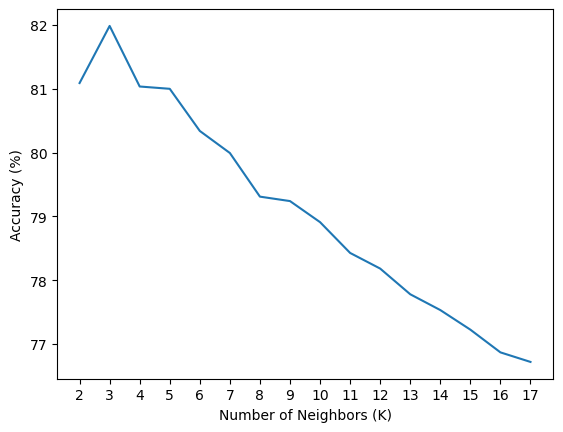

Best k:         fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
67277       16.1                10.7                25.0         21.4   
153906       4.5                 2.2                 5.8          2.1   
138706       2.9                 0.7                68.6          8.6   
133499       3.3                 1.9                 3.3          3.3   
56719       15.0                 5.0                70.0          5.6   
...          ...                 ...                 ...          ...   
26783       39.1                26.1                52.2         47.8   
146349      20.0                 3.3                23.3         16.7   
221215      11.0                 5.0                 0.5          0.5   
244598       6.9                 3.5                47.4         20.9   
27816        0.1                 0.1                12.9         12.1   

        fiber_100g  proteins_100g  salt_100g  sodium_100g  \
67277          2.4           10.7        0.7          

In [62]:
k_range = range(2, 18)

best_k, best_accuracy = knn_classifier_colb(data_classifier2, 'nutrition_grade_fr', k_range)
print("Best k:", best_k)
print("Best accuracy:", best_accuracy)

k = 3 est le plus performant avec un pourcentage de 81.98400412796698 %.
On peut d'ailleur observer la courbe qui effectue un pic lorsque k = 3 avant de redescendre. 
Le nombre de voisin optimal est donc de 3

In [63]:
dataKNN2

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.9,17.9,60.7,5.3,2.0,10.0,7.1,NaN,0.0,5.4,0.1,0.0,0.0,0.0
3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.6,57.1,17.9,5.4,4.0,12.0,7.1,NaN,0.0,16.8,0.1,0.0,0.0,0.0
5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,0.9,0.3,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,11.5,18.3,63.5,1.9,0.0,12.7,7.7,NaN,0.1,3.6,0.0,0.0,0.0,0.0
7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,15.6,18.8,57.8,4.7,3.0,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",0.1,4.9,0.1,0.0,0.0,0.0
8,États-Unis,Organic Dark Chocolate Minis,2406.0,5.0,0.1,0.0,0.0,0.0,0.0,[ organic-chocolate-liquor -> en:organic-choc...,42.5,37.5,55.0,22.5,0.0,21.0,7.5,NaN,0.0,1.3,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,Royaume-Uni,Santa Cruz Chilli & Lime Dressing,660.0,0.3,0.5,0.2,0.0,0.0,1.0,[ water -> en:water ] [ sugar -> en:sugar ...,16.7,6.9,23.1,0.5,3.0,6.0,0.6,E415 - Gomme xanthane,0.0,5.8,0.1,0.0,0.0,0.0
320702,France,Fisherman's Friend Miel-Citron,1031.0,0.0,0.0,0.0,1.0,0.0,5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.1,1.3,95.3,1.3,2.0,2.0,1.5,"E420 - Sorbitol,E955 - Sucralose,E950 - Acésul...",0.0,1.0,0.1,0.0,0.0,0.0
320738,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,30.6,9.7,61.1,2.8,4.0,11.0,8.3,E322 - Lécithines,0.1,7.0,0.6,0.1,0.0,0.0
320742,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],2.4,8.9,87.1,2.3,1.0,9.7,4.7,NaN,0.1,0.8,0.1,0.0,0.0,0.0


In [ ]:
dataKNN2.to_csv("Notebook_openfoodfacts_clean2.csv")